<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Wine Quality</font></h1>
<h2 align="center"><font size="5">Deadline: 2020-07-12 18:00:00</font></h2>
<h3 align="center"><font size="5"> Total marks: 3.0</font></h3>

### Your information:
- Fullname: Nguyễn Thanh Ý
- Date of birth: 03/11/1998
- Place of birth: Khánh Hòa
- Email: thanhynguyen123@gmail.com
- Mobile phone: 0387894261

In this notebook, we practice all the knowledge and skills that we learned in this course.
Please choose one suitable algorithm (**Linear Regression**) to predict: "wine quality" by accuracy evaluation methods.

Please read [Wine Quality information](https://archive.ics.uci.edu/ml/datasets/wine+quality) carefully before you do this project! 

Dataset: winequality-red.csv and winequality-white.csv

#### Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

###### Output variable (based on sensory data):
12. quality (score between 0 and 10)

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [8]:
df_red = pd.read_csv("winequality-red.csv",sep=';')
df_white = pd.read_csv("winequality-white.csv",sep=';')
df1 = pd.concat([df_red,df_white],ignore_index=True)
df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
# sns.pairplot(df1.corr())

In [12]:
# Remove Duplicates
df2 = df1.drop_duplicates()
df2.shape

(5318, 12)

In [13]:
df2.iloc[:, 0:-1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [14]:
corr = df2.corr()['quality'].drop('quality')
corr

fixed acidity          -0.080190
volatile acidity       -0.265354
citric acid             0.097926
residual sugar         -0.056824
chlorides              -0.201960
free sulfur dioxide     0.054199
total sulfur dioxide   -0.050183
density                -0.326301
pH                      0.039789
sulphates               0.042040
alcohol                 0.469216
Name: quality, dtype: float64

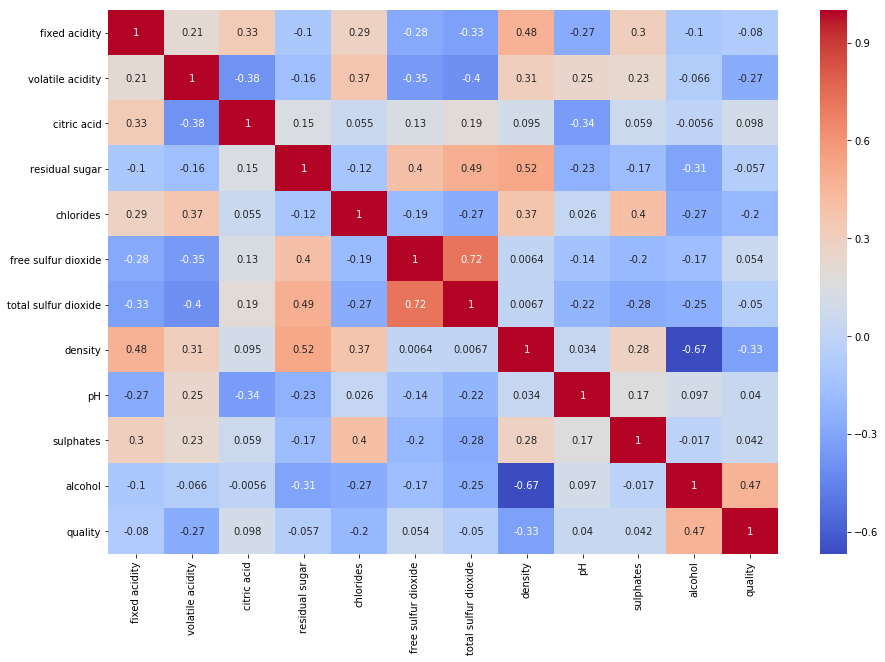

In [15]:
plt.subplots(figsize=(15, 10))
sns.heatmap(df2.corr(), annot = True, cmap = "coolwarm")

In [16]:
def features(correlation_threshold):
    abs_corrs = corr.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [17]:
list_features= features(0.06)
list_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'density',
 'alcohol']

In [20]:
# Sử dụng Linear Regression với 11 variables
x = df2[list_features]
y = df2['quality']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1)
print ('Train set:', x_train.shape, y_train.shape)
print ('Test set:', x_test.shape, y_test.shape)

Train set: (4254, 6) (4254,)
Test set: (1064, 6) (1064,)


Intercept: -38.88503496541069
Coefcient: [-1.58031863e-02 -1.34417573e+00 -4.89833335e-02 -3.32460738e-01
  4.12791712e+01  4.01573300e-01]


c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


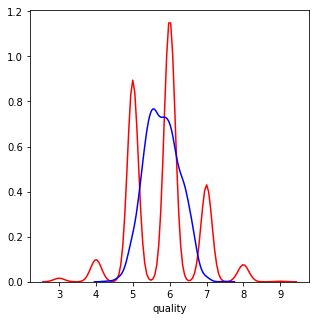

R_square: 0.28206163110759364
MSE: 0.553846363275931


In [21]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Intercept:',lr.intercept_)
print('Coefcient:',lr.coef_)
yhat_train = lr.predict(x_train)
plt.figure(figsize=(5,5))
ax1 = sns.distplot(y_train,hist=False,color='r')
sns.distplot(yhat_train,hist=False,color='b',ax=ax1)
plt.show()
plt.close()
print('R_square:',lr.score(x_train,y_train))
print('MSE:',mean_squared_error(yhat_train,y_train))

Intercept: -22.867529457519108
Coefcient: [-0.03353791 -1.54001844  0.10806792  1.50271899 25.46052316  0.37957614]


c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


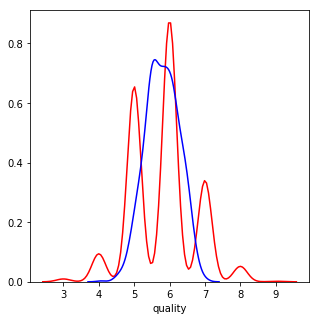

R_square: 0.2837078832924903
MSE: 0.5608464976744792


In [22]:
lr = LinearRegression()
lr.fit(x_test,y_test)
print('Intercept:',lr.intercept_)
print('Coefcient:',lr.coef_)
yhat_test = lr.predict(x_test)
plt.figure(figsize=(5,5))
ax1 = sns.distplot(y_test,hist=False,color='r')
sns.distplot(yhat_test,hist=False,color='b',ax=ax1)
plt.show()
plt.close()
print('R_square:',lr.score(x_test,y_test))
print('MSE:',mean_squared_error(yhat_test,y_test))